In [0]:
!pip install qiskit

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

from qiskit import BasicAer
from qiskit.tools.visualization import plot_histogram
from qiskit.circuit.library import TwoLocal
from qiskit.optimization.applications.ising import max_cut
from qiskit.aqua.algorithms import VQE, NumPyMinimumEigensolver
from qiskit.aqua.components.optimizers import SPSA
from qiskit.aqua import QuantumInstance
from qiskit.optimization.applications.ising.common import sample_most_likely

In [0]:
n = 4
G = nx.Graph()
G.add_nodes_from(np.arange(0, n, 1))
elist = [(0, 1, 1.0), (0, 2, 1.0), (0, 3, 1.0), (1, 2, 1.0), (2, 3, 1.0)]
G.add_weighted_edges_from(elist)

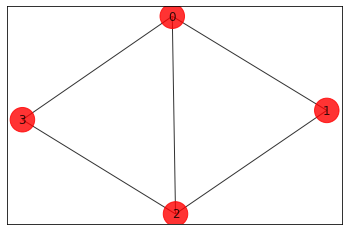

In [12]:
colors = ['r' for node in G.nodes()]
pos = nx.spring_layout(G)
default_axes = plt.axes(frameon=True)
nx.draw_networkx(G, node_color=colors, node_size=600, alpha=0.8, pos=pos, ax=default_axes)

In [0]:
#Weight matrix for the graph

w = np.zeros([n, n])
for i in range(n):
  for j in range(n):
    temp = G.get_edge_data(i, j, default=0)
    if temp != 0:
      w[i, j] = temp['weight'] 

In [16]:
print(w)

[[0. 1. 1. 1.]
 [1. 0. 1. 0.]
 [1. 1. 0. 1.]
 [1. 0. 1. 0.]]


In [0]:
hamiltonian, offset = max_cut.get_operator(w)

In [0]:
seed = 10598

spsa = SPSA(max_trials=300)
ry = TwoLocal(hamiltonian.num_qubits, 'ry', 'cz', reps=5, entanglement='linear')
vqe = VQE(hamiltonian, ry, spsa)


In [0]:
backend = BasicAer.get_backend('statevector_simulator')
quantum_instance = QuantumInstance(backend, seed_simulator=seed, seed_transpiler=seed)

In [0]:
result = vqe.run(quantum_instance)

Energy:  -1.49779043958844
Time 7.160440444946289
MaxCut objective:  -3.99779043958844
Solution:  [0. 1. 0. 1.]
Solution objective:  4.0


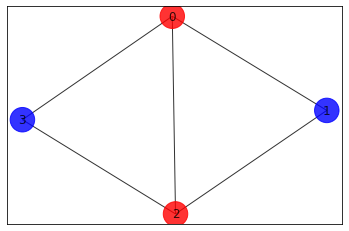

In [41]:
x = sample_most_likely(result.eigenstate)
print("Energy: ", result.eigenvalue.real)
print("Time", result.optimizer_time)
print("MaxCut objective: ", result.eigenvalue.real + offset)
print("Solution: ", max_cut.get_graph_solution(x))
print("Solution objective: ", max_cut.max_cut_value(x, w))

colors = ['r' if max_cut.get_graph_solution(x)[i] == 0 else 'b' for i in range(n)]
nx.draw_networkx(G, node_color=colors, node_size=600, alpha=0.8, pos=pos)